In [1]:
from itertools import product
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.transforms as mtransforms
from matplotlib.lines import Line2D

plt.rc('figure', facecolor='w')

In [2]:
def read_sd(filename):
    return np.loadtxt(filename).T

def plot_sd_single(ax, filename):
    x, y = read_sd(filename)
    ax.plot(x, y, color='#1f77b4')

In [3]:
filenames = {
    'La': [
        'B3LYP/B3LYP_gas_La_SD.dat',
        'B3LYP/MM_gas_La_SD.dat',
        'B3LYP/ANI-2x_gas_La_SD.dat',
        'B3LYP/B3LYP_ElEmb_La_SD.dat',
        'B3LYP/MM_MM_La_SD.dat',
        'B3LYP/ANI-2x_EMLE_La_SD.dat',
        'B3LYP/ANI-2x_EMLE-NoPol_La_SD.dat',
        'B3LYP/ANI-2x_EMLE-Mech_La_SD.dat',
        'B3LYP/ANI-2x_MM_La_SD.dat',
    ],
    'Lb': [
        'B3LYP/B3LYP_gas_Lb_SD.dat',
        'B3LYP/MM_gas_Lb_SD.dat',
        'B3LYP/ANI-2x_gas_Lb_SD.dat',
        'B3LYP/B3LYP_ElEmb_Lb_SD.dat',
        'B3LYP/MM_MM_Lb_SD.dat',
        'B3LYP/ANI-2x_EMLE_Lb_SD.dat',
        'B3LYP/ANI-2x_EMLE-NoPol_Lb_SD.dat',
        'B3LYP/ANI-2x_EMLE-Mech_Lb_SD.dat',
        'B3LYP/ANI-2x_MM_Lb_SD.dat',
    ]
}

systems = ['B3LYP (gas)', 'MM (gas)', 'ANI-2x (gas)', 
           'B3LYP/MM', 'MM', 'ANI-2x(EMLE)/MM', 
           'ANI-2x(EMLE-NoPol)/MM', 'ANI-2x(EMLE-Mech)/MM', 'ANI-2x(MM)/MM']

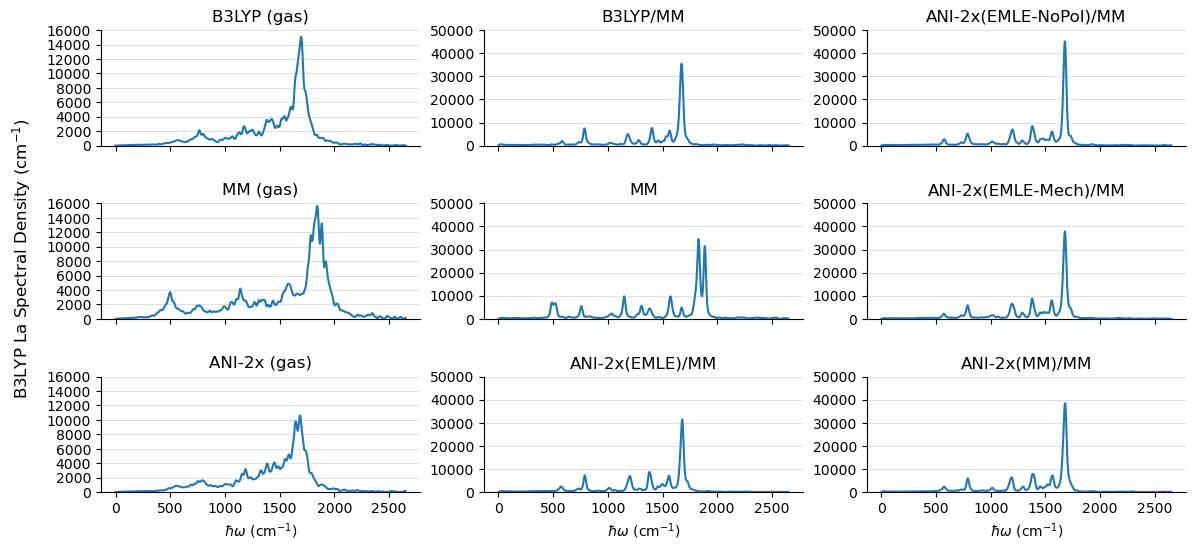

In [4]:
fig, axs = plt.subplots(3, 3, figsize=(14, 6), sharex=True)
fig.subplots_adjust(hspace=0.5)

gas_range = (0, 16000)
solv_range = (0, 50000)
ranges = [gas_range] * 3 + [solv_range] * 6

gas_ticks = np.arange(0, 17000, 2000)
solv_ticks = np.arange(0, 51000, 10000)
yticks = [gas_ticks] * 3 + [solv_ticks] * 6

for i, (system, filename, ax) in enumerate(zip(systems, filenames['La'], axs.T.flatten())):
    plot_sd_single(ax, filename)
    ax.patch.set_alpha(0.)
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.set_ylim(*ranges[i])
    ax.set_yticks(yticks[i])
    for ytick in yticks[i]:
        ax.axhline(ytick, linewidth=0.5, color='lightgrey', zorder=0)
    if i in [2, 5, 8]:
        ax.set_xlabel('$\hbar \omega$ (cm$^{-1}$)')
    ax.set_title(system)
    
fig.text(0.06, 0.5, 'B3LYP La Spectral Density (cm$^{-1}$)', va='center', rotation='vertical', fontsize='large')
fig.savefig('FigS4_top.png', dpi=300, bbox_inches='tight')
plt.show()

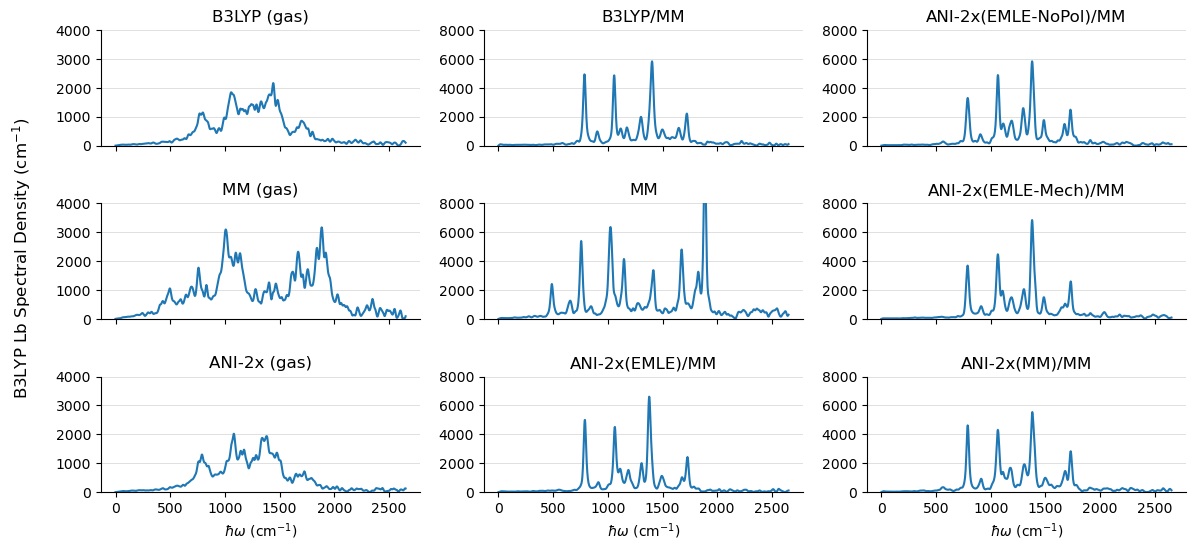

In [5]:
fig, axs = plt.subplots(3, 3, figsize=(14, 6), sharex=True)
fig.subplots_adjust(hspace=0.5)

gas_range = (0, 4000)
solv_range = (0, 8000)
ranges = [gas_range] * 3 + [solv_range] * 6

gas_ticks = np.arange(0, 5000, 1000)
solv_ticks = np.arange(0, 9000, 2000)
yticks = [gas_ticks] * 3 + [solv_ticks] * 6

for i, (system, filename, ax) in enumerate(zip(systems, filenames['Lb'], axs.T.flatten())):
    plot_sd_single(ax, filename)
    ax.patch.set_alpha(0.)
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.set_ylim(*ranges[i])
    ax.set_yticks(yticks[i])
    for ytick in yticks[i]:
        ax.axhline(ytick, linewidth=0.5, color='lightgrey', zorder=0)
    if i in [2, 5, 8]:
        ax.set_xlabel('$\hbar \omega$ (cm$^{-1}$)')
    ax.set_title(system)
    
fig.text(0.06, 0.5, 'B3LYP Lb Spectral Density (cm$^{-1}$)', va='center', rotation='vertical', fontsize='large')
fig.savefig('FigS4_bottom.png', dpi=300, bbox_inches='tight')
plt.show()